# Исследование продаж игр

В нашем распоряжении исторические данные из открытых источников о продаже игр, оценки пользователей, экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:**
- определить суммарные продажи во всех регионах
- проанализировать продажи игр за предыдущие годы, определить факторы влияющие на продажи
- составить портрет пользователя каждого региона
- проверить гипотезу о различии пользовательских рейтингов платформ Xbox One и PC
- проверить гипотезу о различии пользовательских рейтингов жанров Action и Sports

**Данные**

Данные для исследования будут получены из файла `/datasets/games.csv`. В первую очередь необходимо проверить данные на ошибки и пропуски в значениях, определить их влияние на результат исследования. Далее, при необходимости будут изменены типы данных, добавлены столбцы и заполнены пропуски.

Описание данных:
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

 
 **Ход исследования:**
 1. Обзор данных
 2. Предобработка данных
 3. Рассчеты и добавление данных о продажах
 4. Исследовательский анализ данных продаж
 5. Составление портрета пользователя каждого региона
 6. Проверка гипотез
 7. Общий вывод

## Обзор данных

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [66]:
df = pd.read_csv('ds/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [67]:
df.shape
print(f'Перед нами датасет из {df.shape[0]} строк и {df.shape[1]} столбцов.')

Перед нами датасет из 16715 строк и 11 столбцов.


In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходмо:
 - изменить регистр названия столбцов для удобства
 - изменить типы данных в столбцах `Year_of_Release`, `User_Score` и `Rating`

In [69]:
df.columns = df.columns.str.lower()

In [70]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Минимальные и максимальные значения количественных переменных выглядят адекватно. Проверим еще раз позже со сначениями столбцов `user_score` и `rating` после изменения типов

In [71]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

Наибольшая доля пропусков в столбцах `critic_score`, `user_score`и `rating`. На этапе предобработки определимся, как поступить с ними.

In [8]:
df.duplicated().sum()

0

Явных дубликатов в датасете нет. Попробуем привести к нижнему регистру названия игр и поискать неявные дубликаты

In [9]:
df['name'] = df['name'].str.lower()
df.duplicated().sum()


0

Дубликатов так же нет. Искать дубликаты в колонке `name` не имеет смысла так, как одна и таже игра могла выходить на разных платформах и иметь разные показатели продаж.

**Вывод:**

- Перед нами датасет с данными о продажах игр по регионам NA, EU, и JP в  периоде с 1980 по 2016 года. Так же в данных представлена информация о жанрах и платформах на которых она выпускалась. В этих данных доля пропусков составляет менне 2%.
- Так же представлены рейтинги ESRB, оценки пользователей и критиков. В данных колонках доля пропусков составляет от 40% до 51%, необходимо будет оценить возможность и целесообразность их заполнения для дальнейшей работы.
- В основном типы данных соответствуют их значениям, за исключением колонок `Year_of_Release`, `User_Score` и `Rating` их мы поменяем на этапе предобработки.

## Предобработка данных

### Работа с пропусками

In [10]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

**Удалим строки с пропусками в столбцах `genre` и `name`.** Их мало и удаление не изменит общей картины данных

In [11]:
df = df.dropna(subset=['genre', 'name'])

**Колонка `year_of_release`**

In [12]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
df['year_of_release'].isna().sum()

269

Имеем 269 строк с пропущенными значениями годов выпуска. Удалять и заменять пропуски не будем, поскольку в данных все равно хранятся знчания рейтингов и продаж. Заменять значения так же не станем, впоследствии заменим тип данных

**Посмотрим на столбец `rating` и посмотрим на значения**

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В данном столбце представлены рейтинги [ESRB](https://www.esrb.org/ratings-guide/)
- E - Для всех
- M - Для взрослых
- T - Подросткам
- E10+ - Для всех от 10 лет и старше
- K-A - Для всех (рейтинг до 1998 года)
- AO - Только для взрослых
- EC - Для детей младшего возраста
- RP - Рейтинг ожидается

Рейтинг K-A и E целесообразно объеденить в одну группу, поскольку это одно и тоже название в разные года.
Пропущенные значения заменим на `unknown`, так как рейтинг не определен. И в конце взглянем на строки с рейтингом RP, если их окажется незначительное количество - удалим


In [15]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].fillna('unknown')

In [16]:
df[df['rating'] == 'RP']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,clockwork empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,supreme ruler: cold war,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,wrc: fia world rally championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


С рейтингом RP всего 3 позици

In [17]:
df = df[df['rating'] !='RP']

**Колонка `critic_score`:**

In [18]:
print('Доля пропусков: ', df['critic_score'].isna().sum() / len(df))
print(df['critic_score'].unique())

Доля пропусков:  0.5132256134051466
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


К колонке `critic_score` 51% пропусков. Заменять пропуски значениями не будем, для того что бы не исказать данные по рейтингам.

**Колонка `user_score`:**

In [19]:
print('Доля пропусков: ',df['user_score'].isna().sum() / len(df))
print(df['user_score'].unique())

Доля пропусков:  0.40083782166367443
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В колонке `user_score` около 40% пропусков и есть значение 'tbd'(to be determined),которое предположительно, обозначает, что рейтинг не сформирован по причине малого количества оценок или не прошел определенные этапы. Для того чтобы в дальнейшем работать с данными целесобразнее всего `tbd` заменать на `NaN` для того чтобы заменить тип данных в колонке и в то же время не исказить данные, заменяя значения например `0`

In [20]:
len(df[df['user_score'] == 'tbd']) / len(df)

0.1450628366247756

Как видно строк со значением tbd 14.5% от всех данных. Удалить их так же выглядит нецелесообразно. 

In [21]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

**Вывод:**

In [22]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

user_score         0.545901
critic_score       0.513226
year_of_release    0.015978
name               0.000000
platform           0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
rating             0.000000
dtype: float64

У нас остался датасет с пропусками в 3-х колонках. Для подготовки данных пришлось увеличить колиество пропусков в колонке `user_score`, но для поставленных задача считаю, что это допустимо, так как подстановка или удаление значений снизит репрезентативность данных.

### Изменение типов данных

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       7588 non-null   object 
 10  rating           16710 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Необходимо:
- заменить тип данных `year_of_release` на `int`, (не будем приволить к типу `datetime`, так как в данных имеем только год)
- заменить `critic_score` на `float`
- `user_score` на `float` 

In [24]:
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
df['critic_score'] = df['critic_score'].astype('float')
df['user_score'] = df['user_score'].astype('float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           16710 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Рассчеты и добавление данных о продажах

Для дальнейшего анализа добавим в датасет колонку с общим количеством продаж по регионам.

In [26]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ данных продаж

### Выпуск игр по годам

Посмотрим сколько игр выпускалость в разные годы:

In [27]:
df.groupby('year_of_release')[['name']].count()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


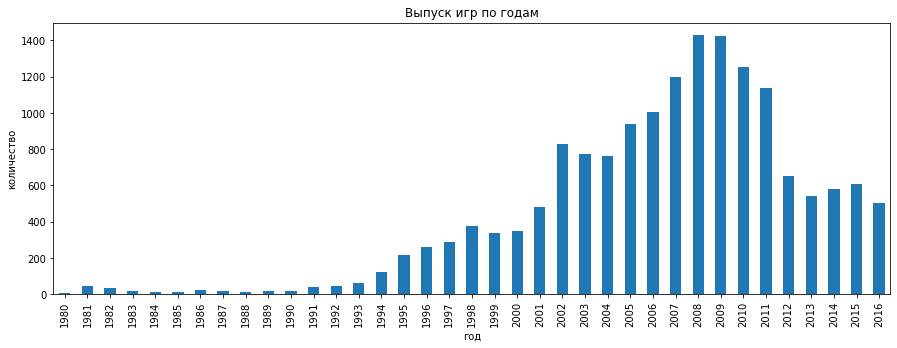

In [28]:
df.groupby('year_of_release')[['name']].count() \
.plot(kind='bar', figsize=(15,5), title='Выпуск игр по годам', ylabel='количество', xlabel='год', legend=False);

На графике видно 2 года (1993, 2001), после которых резко увеличивался выпуск игр. Так же наблюдается спад после 2011 года.

### Анализ популярных платформ

Найдем платформы с наибольшими суммарными продажами по всем годам

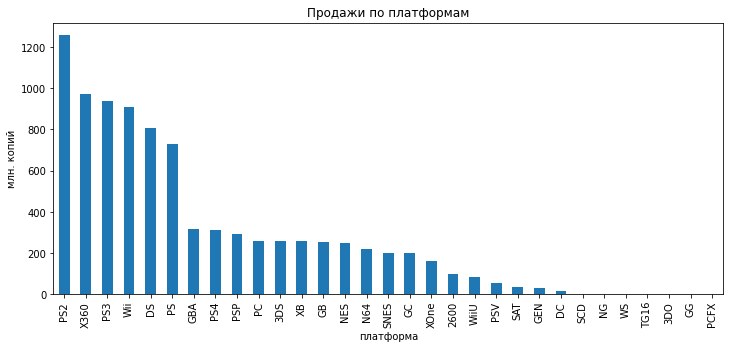

In [29]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,5), title='Продажи по платформам', ylabel='млн. копий', xlabel='платформа');

На графике видно, что больше всего копий было продано у 6 платформ.

Посмотрим на продажи этих платформ и посчитаем их долю от общего количества

In [30]:
top_6_platforms = df.groupby('platform')[['all_sales']].sum().sort_values(by='all_sales',ascending=False).head(6)
top_6_platforms

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


In [31]:
top_platforms = df[df['platform'].isin(top_6_platforms.index)]
print('Доля продаж 6-ти самых популярных платформ от отбего количества составляет:',\
      round(top_platforms['all_sales'].sum() / df['all_sales'].sum(),2))

Доля продаж 6-ти самых популярных платформ от отбего количества составляет: 0.63


Посмотрим, как распределялись продажи по годам

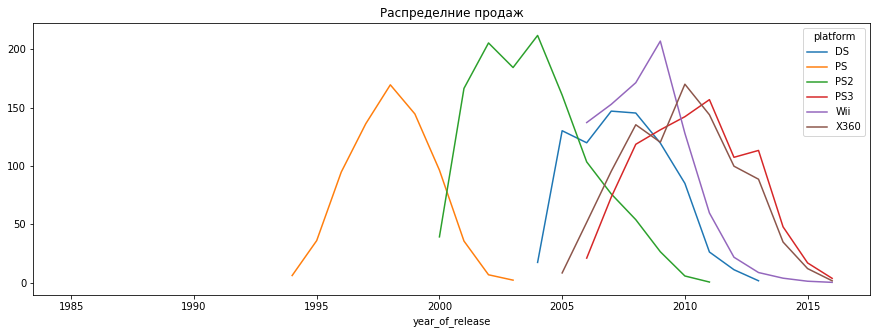

In [32]:
top_platforms.pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum')\
.plot(figsize=(15,5), title='Распределние продаж');

На графике видно, что в среднем каждая платформа 'живет' около 10 лет.

Для дальшейшего анализа будем учитывать период с 2005 года, так как популярные платформы выпущенные до 2005 года на данный момент не поддерживаются.

In [33]:
df_actual = df[df['year_of_release'] >= 2005] #269 строк с отсутствующими значениями по дате релиза так же опускаем, из-за неактуальности данных в этом случае

Взглянем на лидеров продаж запериоды с 2005 по 2016 и с  2014 по 2016 года.

In [34]:
a = df_actual[df_actual['year_of_release']>=2005].groupby('platform')[['all_sales']].sum().sort_values(by='all_sales', ascending=False)
b = df_actual[df_actual['year_of_release']>=2014].groupby('platform')[['all_sales']].sum().sort_values(by='all_sales', ascending=False)

In [35]:
a.merge(b, how='left', on='platform', suffixes=('_2005-2016', '_2014-2016')).sort_values(by='all_sales_2014-2016', ascending=False)

,all_sales_2005-2016,all_sales_2014-2016
platform,,
PS4,314.14,288.15
XOne,159.32,140.36
3DS,257.81,86.68
PS3,931.34,68.18
X360,961.24,48.22
WiiU,82.19,42.98
PC,167.75,27.05
PSV,53.81,22.40
Wii,891.18,5.07


Из таблицы видно, что лидерами по продажам с 2005 по 2016 год являются платформы X360 и Wii, но за период с 2014 по 2016 из популярность заметно снизилась. Потенциальными лидерами будем считать платформы лидеры за период с 2014 года.

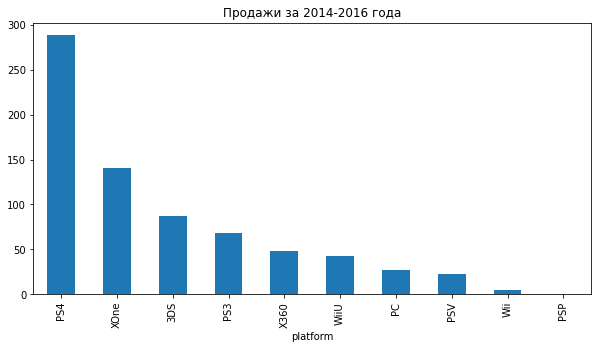

In [36]:
df_actual[df_actual['year_of_release']>=2014] \
.groupby('platform')['all_sales'].sum().sort_values(ascending=False)\
.plot(kind='bar', figsize=(10,5), title='Продажи за 2014-2016 года');


Для того чтобы определить продажи каких платформ растут или падают возьмем период с 2012 по 2016 года.

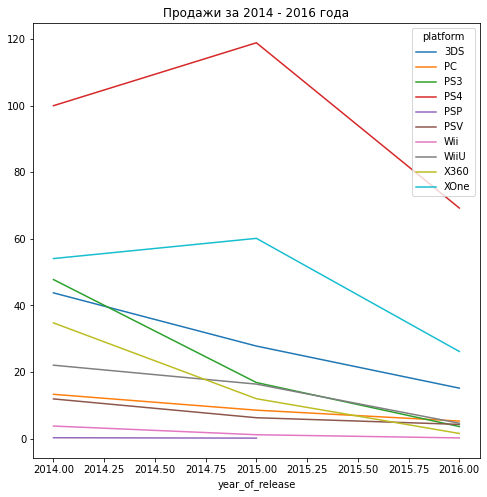

In [37]:
df_actual[df_actual['year_of_release'] >= 2014] \
    .pivot_table(index='year_of_release',
                 values='all_sales',
                 columns='platform',
                 aggfunc='sum') \
    .plot(figsize=(8,8), title='Продажи за 2014 - 2016 года');

Продажи с 2014 по 2015 растут у платформ PS4 и XOne и наоборот падают у PS3 и X360, что является абсолютно логичным так как это платформы предыдущих поколений.
К потенциально прибыльным платформам отнесем:
- PS4
- XOne
- 3DS
- WiiU

Распределение продаж в 2016 году схоже с 2015 годом, но продажи на всех платформах снизились. Такая картина возможна из-за того что за 2016 год неполные.

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

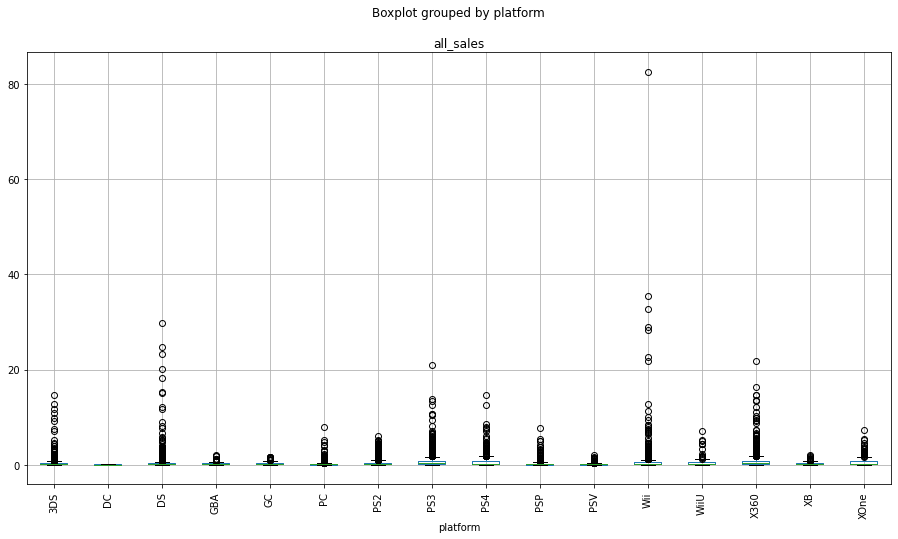

In [38]:
df_actual.boxplot(column='all_sales', by='platform', rot=90, figsize=(15,8))

На графике наблюдается много выбрасов из-за чего не удается оценить распределения достаточно точно. Дополнительно посмотрим на распределения с ограничением до 1 млн. копий за год:

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

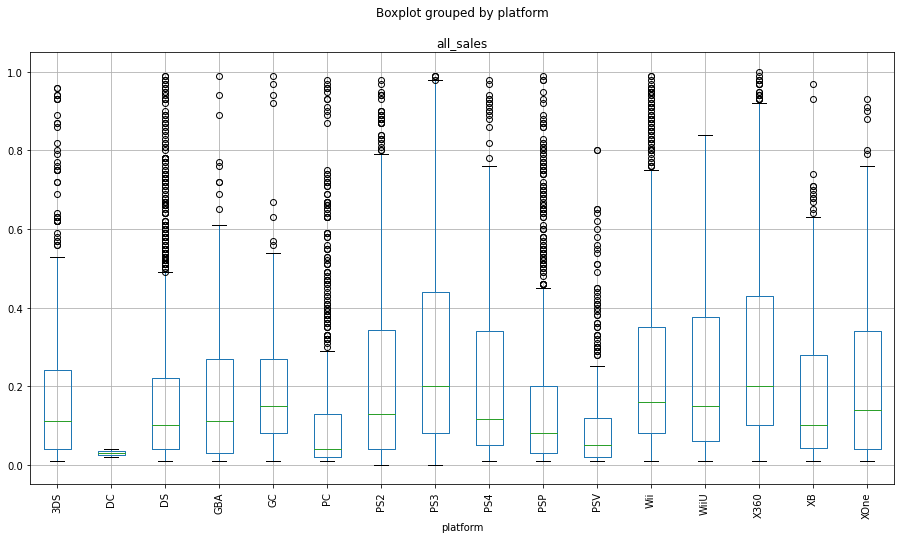

In [39]:
df_actual.query('all_sales < 1').boxplot(column='all_sales', by='platform', rot=90, figsize=(15,8))

По двум графикам можно сделать следующие выводы:
- наибольшее количество продданых копий за год у платформы Wii
- наибольшие медианные значения у платформа PS3 и X360
- наименее низкие медианные значения у платформ DC и PC

Среди птаформ выделяются несколько с более выраженными выбросами чем у остальных, это может нам говорить о наличии периодов высокой популярности платформы в определенном периоде времени и удачной маркетинговой компании.

### Влияние отзывов на продажи 

Взглянем еще раз на самые популярные птаформы за последний переод и проанализируем влияние отзывов пользователей и оценок критиков на продажи

In [40]:
df_actual[df_actual['year_of_release']>=2015].groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: all_sales, dtype: float64

Построим диаграммы рассеяния для платформы PS4:

<AxesSubplot:title={'center':'WiiU'}, xlabel='user_score', ylabel='all_sales'>

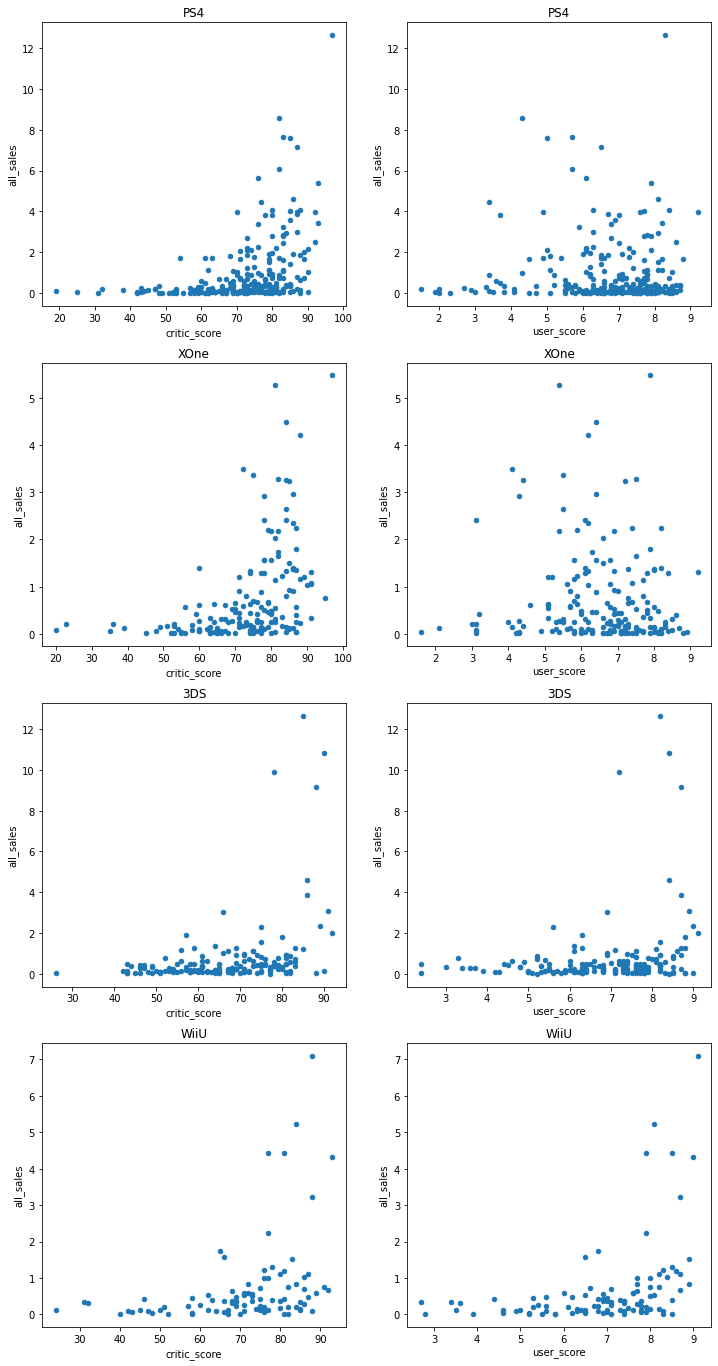

In [41]:
list = ['PS4', 'XOne', '3DS', 'WiiU']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 24))
df_actual[df_actual['platform'] == 'PS4'].plot(kind='scatter', x='critic_score', y = 'all_sales', ax=axes[0,0], title='PS4')
df_actual[df_actual['platform'] == 'PS4'].plot(kind='scatter', x='user_score', y = 'all_sales', ax=axes[0,1], title='PS4')
df_actual[df_actual['platform'] == 'XOne'].plot(kind='scatter', x='critic_score', y = 'all_sales', ax=axes[1,0], title='XOne')
df_actual[df_actual['platform'] == 'XOne'].plot(kind='scatter', x='user_score', y = 'all_sales', ax=axes[1,1], title='XOne')
df_actual[df_actual['platform'] == '3DS'].plot(kind='scatter', x='critic_score', y = 'all_sales', ax=axes[2,0], title='3DS')
df_actual[df_actual['platform'] == '3DS'].plot(kind='scatter', x='user_score', y = 'all_sales', ax=axes[2,1], title='3DS')
df_actual[df_actual['platform'] == 'WiiU'].plot(kind='scatter', x='critic_score', y = 'all_sales', ax=axes[3,0], title='WiiU')
df_actual[df_actual['platform'] == 'WiiU'].plot(kind='scatter', x='user_score', y = 'all_sales', ax=axes[3,1], title='WiiU')


Посмотрим на корреляции `all_sales` с `user_score` и `critic_score`:

In [42]:
user_cor = []
critic_cor = []
for i in ['PS4', 'XOne', '3DS', 'WiiU']:
    user_cor.append(df_actual[df_actual['platform'] == i]['all_sales'].corr(df_actual[df_actual['platform'] == i]['user_score']))
    critic_cor.append(df_actual[df_actual['platform'] == i]['all_sales'].corr(df_actual[df_actual['platform'] == i]['critic_score']))

In [43]:
pd.DataFrame(
    {'user_cor': user_cor,
     'critic_cor': critic_cor, 
    })

,user_cor,critic_cor
0,-0.031957,0.406568
1,-0.068925,0.416998
2,0.222078,0.348740
3,0.400219,0.348380


По результатам вычислений можно сделать вывод о том, что продажи умеренно положительно коррелируют с отывами критиков, чего нельзя сказать о корреляции с отзывами пользователей. Она может быть как положительной так и почти нулевой, что говорит нам о том что продажи не сильно зависят от оценок пользователей.

### Анализ жанров

Посмотрим на количество выпущенных уникальных игр в разрезе жанров:

<AxesSubplot:title={'center':'Количество уникальных выпущенных ирг по жанрам'}, xlabel='genre'>

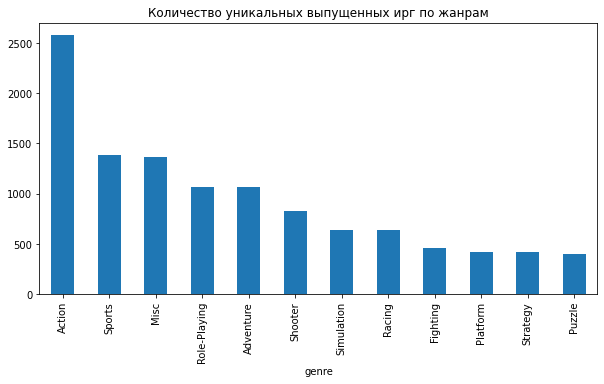

In [44]:
df_actual.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Количество уникальных выпущенных ирг по жанрам')

Посмотрим как размределяются жанры в зависимости от среднего показателя продаж. Для этого посмотрим как в целом распределяются значения по всем продажам.

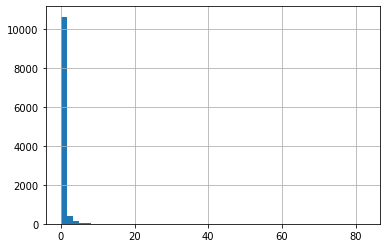

In [45]:
df_actual['all_sales'].hist(bins=50);

Как и ожидалось распределение экспоненциальное, поэтому будем использовать медиану для более корректного анализа.

<AxesSubplot:title={'center':'Количество проданных копий'}, xlabel='genre'>

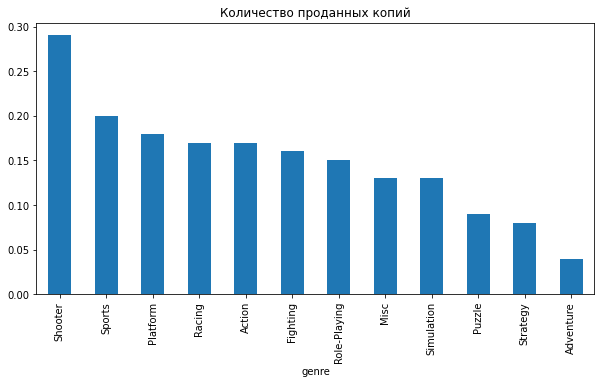

In [46]:
df_actual.groupby('genre')['all_sales'].median().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Количество проданных копий')

Можно выделить следующие жанры наиболее высокими медианными продажами:
- Shooter
- Sports
- Platform
- Rasing
- Action

С наименьшими значениями жанры Adventure и Strategy

## Портрет пользователя

Составим портреты пользователей на основе данных по регионам NA, EU и JP

**Предпочтения по платформам**

In [47]:
df_actual.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,82.65,61.27,100.62
DC,0.00,0.00,0.06
DS,371.98,184.48,171.35
GBA,26.85,10.19,4.78
GC,27.97,7.47,2.78
PC,45.84,102.98,0.00
PS2,200.49,87.14,50.98
PS3,390.13,327.21,79.41
PS4,108.74,141.09,15.96


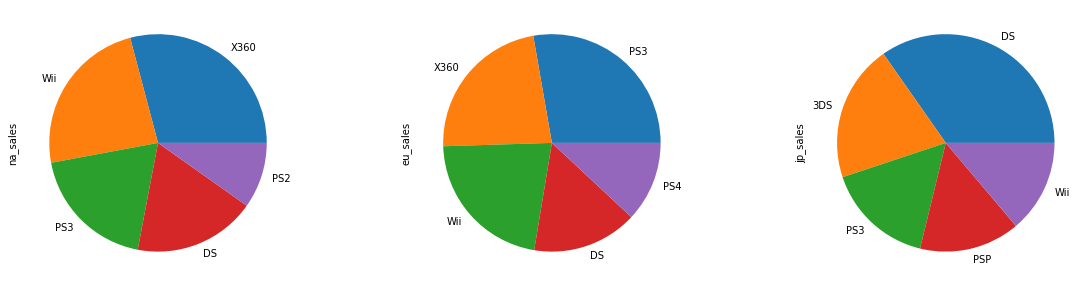

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
df_actual.pivot_table(index='platform', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='pie', subplots=True, legend=False,  ax=axes[0])
df_actual.pivot_table(index='platform', values = 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='pie', subplots=True, legend=False,  ax=axes[1])
df_actual.pivot_table(index='platform', values = 'jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='pie', subplots=True, legend=False,  ax=axes[2]);

В целом регионы NA и EU схожи по предпочтению платформ за исключением того, что в регионе NA более популярна платформа X360 чем в EU,  что закономерно, так как X360 производится в регионе NA.
Регион JP отличается от остальных предпочтением локальных платформ таких как Nintendo DS и Nintendo 3DS, которые не так популярны в остальном мире.

**Предпочтения по жанрам**

In [49]:
df_actual.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()

,na_sales,eu_sales,jp_sales
genre,,,
Action,580.04,372.58,108.39
Adventure,66.57,39.93,30.27
Fighting,104.63,47.09,31.68
Misc,311.82,167.09,72.49
Platform,149.75,86.93,36.32
Puzzle,49.03,33.81,18.64
Racing,163.58,129.05,17.57
Role-Playing,211.85,115.52,179.60
Shooter,400.96,248.07,20.67


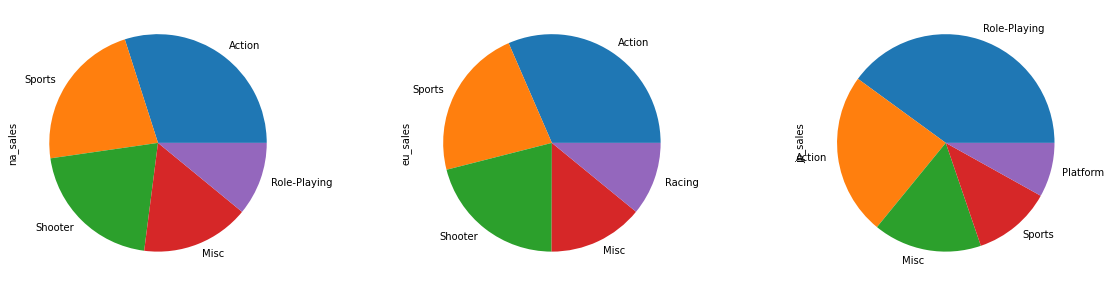

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
df_actual.pivot_table(index='genre', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='pie', subplots=True, legend=False,  ax=axes[0])
df_actual.pivot_table(index='genre', values = 'eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='pie', subplots=True, legend=False,  ax=axes[1])
df_actual.pivot_table(index='genre', values = 'jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='pie', subplots=True, legend=False,  ax=axes[2]);

В регионах NA и EU предпочтения по жанрам схожи, за исключением жарнов Role-Playing и Racing, которые находятся на 5-х местах. В отличии от этих регионов, в регионе JP самый популярный жанр Role-Playing и в пятерке популярных присутствует жанр Platfotm возможно по той причине, что эти жанры самые популярные на платформах DS и 3DS.

**Влияние рейтинга ESRB**

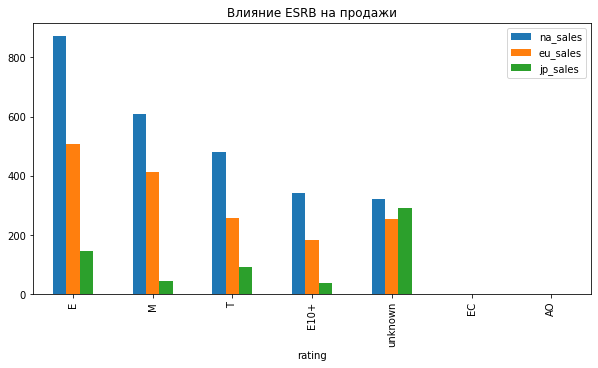

In [51]:
df_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)\
.plot(kind='bar', figsize=(10,5), title='Влияние ESRB на продажи');

На графике продемонстрирована зависимость продаж от рейтинга ESRB. При этом рейтинг ESRB создан для регулирования продаж игр только в  регионе NA. Исходя из этого можно сделасть следующие выводы:

- влияние рейтинга ESRB зависит от конкретного региона. В случае региона NA мы видим, чем больше охват рейтинга по возрасту, тем больше продаж игр с данным рейтингом.
- влияние рейтигра на регион EU в целом схож с рейтингом в NA, но заметно что доля игр без рейтинга больше чем в NA. Можем сделать вывод о менее выраженном влиянии рейтинга на этот регион в сравнении с NA.
- наименее подверден влиянию рейтинга регион JP, так как доля игр без рейтинга превосходит остальные.
- во всех регионах продажи игр с рейтингом EC и AO (для детей и для взрослых соответственно) незначительны, ввиду специфики возрастных ограничений.

## Проверка гипотез

Проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

Для обоих проверок установим значение `alpha` равное 0.05

In [52]:
alpha = 0.05

### Средние пользовательские рейтинги платформ

In [53]:
xbox = df_actual.query('platform == "XOne" & user_score.notna()')['user_score']
pc = df_actual.query('platform == "PC" & user_score.notna()')['user_score']
print(len(xbox), len(pc))

182 643


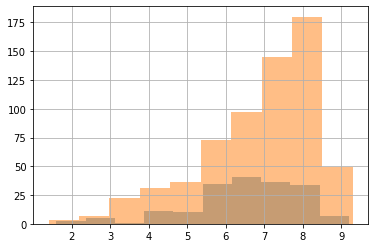

In [54]:
xbox.hist(alpha=0.5)
pc.hist(alpha=0.5);

- Нулевая гипотеза - средние пользовательские рейтинги платформ равны
- Альтернатинвая гипотеза - средние пользовательские рейтинги платформ не равны

Для проверки применим Т-Критерий Стьюдента для независимых выборок. В выборках 182 и 643 наблюдения, что должно невелировать ненормальность распределения в выборках. Так же будем считаль что дисперсии в выборках не равны.

In [55]:
results_1 = st.ttest_ind(xbox, pc, equal_var = False)

In [56]:
print('p-значение: ', results_1.pvalue)
if results_1.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

p-значение:  0.002348497820855446
Отклоняем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports

In [57]:
action = df_actual.query('genre == "Action" & user_score.notna()')['user_score']
sports = df_actual.query('genre == "Sports" & user_score.notna()')['user_score']
print(len(action), len(sports))

1463 757


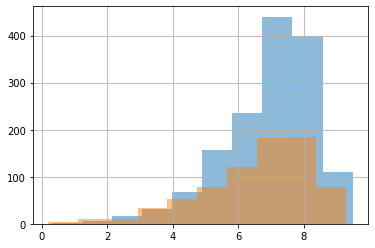

In [58]:
action.hist(alpha=0.5)
sports.hist(alpha=0.5);

- Нулевая гипотеза - средние пользовательские рейтинги жанров равны
- Альтернатинвая гипотеза - средние пользовательские рейтинги жанров не равны

Для проверки применим Т-Критерий Стьюдента для независимых выборок. В выборках 1463 и 757 наблюдения, что должно невелировать ненормальность распределения в выборках. Так же будем считаль что дисперсии в выборках не равны.

In [59]:
results_2 = st.ttest_ind(action, sports, equal_var = False)

In [60]:
print('p-значение: ', results_2.pvalue)
if results_2.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу')

p-значение:  5.717661260563379e-09
Отклоняем нулевую гипотезу


## Вывод

В данном проекте мы изучили данные о продажах игр. Для того, чтобы решить поставленные задачи мы провели:

- Предобработкe данных
- Рассчитали данные о продажах
- Провели исследовательский анализ данных продаж
- Составили портрет пользователя каждого региона
- Проверили гипотезы о средних оценказ пользователей

В результате исследования мы определили следующее:

- 1993 и 2001 года являются ключевыми в игровой индустрии, после которых резко увеличивался выпуск игр. Так же наблюдался спад после 2011 года.
- самые популярные платформы за все время наблюжений: PS2, X360, PS3, Wii, DS и PS
- в среднем каждая платформа 'живет' около 10 лет.
- самые популярны платформы последних двух лет не совпадают с самыми популярными за все время
- к потенциально прибыльным платформам  на текущий момент отнесли: PS4, XOne, 3DS, WiiU
- продажи зависят от оценок критиков в большей степени чем от отзывов покупателей
- выделены следующие жанры наиболее высокими медианными продажами: Shooter, Sports, Platform, Rasing, Action. С наименьшими значениями жанры Adventure и Strategy
- Action и Sports и Shooter самые популярные жанры за исключением Японии. Там самый популярный жанр Role-Playing
- рейтинг ESRB влияет на продажи в основном в регионе NA и в меньшей степени в EU. Расценивать влияние рейтинга в регионе JP нецелесообразно
- получили статистически значимые различия между средними пользовательских рейтингов платформ Xbox One и PC
- получили статистически значимые различия между средними пользовательских рейтингов жанров Action и Sports

Дальнейшие шаги:

- при обновлении данных за 2016 сможем получить более достоверные данные о росте или падении продаж
- необходимо узнать и по возможности устранить причину большой доли отсутвующих данных по рейтингам
- проанализировать взаимосвязб платформ и жанров